# Libreries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.layers import Layer, Conv2D, AveragePooling2D, Flatten, Dense, Softmax, ReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from sklearn.model_selection import train_test_split
from scipy import signal
from GDN import *

## MNIST

In [3]:
# Download mnist data and split into train and test sets
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

In [4]:
# Normalize and reshape
x_train_mnist = x_train_mnist/255.
x_test_mnist = x_test_mnist/255.

x_train_mnist = x_train_mnist.reshape(60000, 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(10000, 28, 28, 1)

print(x_train_mnist.shape)

(60000, 28, 28, 1)


In [5]:
# Model with GDN
model = Sequential()
model.add(GDN(input_shape = x_train_mnist.shape[1:4]))

model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn (GDN)                    (None, 28, 28, 1)         12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Check model weights
model.get_weights()

[array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([1.], dtype=float32),
 array([[[[0.]],
 
         [[0.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[0.]],
 
         [[0.]]],
 
 
        [[[0.]],
 
         [[0.]],
 
         [[0.]]]], dtype=float32)]

In [7]:
# Apply model
x_train_mnist_out = model.predict(x_train_mnist)
print(x_train_mnist_out.shape)

(60000, 28, 28, 1)


In [8]:
print(np.max(x_train_mnist_out[0]), np.max(x_train_mnist[0]))

1.0 1.0


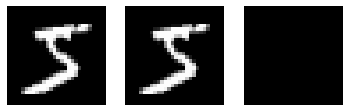

In [9]:
# Visualize model results
plt.subplot(1,3,1)
plt.imshow(tf.squeeze(x_train_mnist[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(x_train_mnist_out[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(tf.squeeze(x_train_mnist_out[0] - x_train_mnist[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()

In [16]:
# Do it by hand
test_1 = x_train_mnist[0][:,:,:]
print(test_1.shape)
test_2 = test_1 ** [1]
print(test_2.shape)
test_3 = signal.convolve(test_2, np.array([[0,0,0],[0,0,0],[0,0,0]]).reshape(3,3,1), mode = 'same', method = 'direct')
print(test_3.shape)
test_4 = test_3 + 1.0
print(test_4.shape)
test_5 = test_4 ** [1]
print(test_5.shape)
test_6 = test_1 / test_5
print(test_6.shape)
print(np.matrix(test_6[15:20,15:20]))

(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
(28, 28, 1)
[[0.72941176 0.99215686 0.99215686 0.58823529 0.10588235]
 [0.0627451  0.36470588 0.98823529 0.99215686 0.73333333]
 [0.         0.         0.97647059 0.99215686 0.97647059]
 [0.50980392 0.71764706 0.99215686 0.99215686 0.81176471]
 [0.99215686 0.99215686 0.99215686 0.98039216 0.71372549]]


In [17]:
# Check the result is the same
print(np.matrix(np.array(x_train_mnist_out[0][15:20,15:20,:]).reshape(5,5)))

[[0.7294118  0.99215686 0.99215686 0.5882353  0.10588235]
 [0.0627451  0.3647059  0.9882353  0.99215686 0.73333335]
 [0.         0.         0.9764706  0.99215686 0.9764706 ]
 [0.50980395 0.7176471  0.99215686 0.99215686 0.8117647 ]
 [0.99215686 0.99215686 0.99215686 0.98039216 0.7137255 ]]


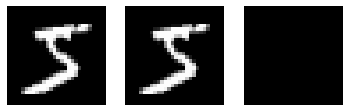

In [19]:
# Visualize the model and the handmade results
plt.subplot(1,3,1)
plt.imshow(test_6.reshape([28,28]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(tf.squeeze(x_train_mnist_out[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(test_6.reshape([28,28])-tf.squeeze(x_train_mnist_out[0]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()

## Fashion MNIST

In [20]:
# Download the data and split into train and test
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fashion_mnist.load_data()

In [21]:
# Normalize and reshape
x_train_fmnist = x_train_fmnist/255.
x_test_fmnist = x_test_fmnist/255.

x_train_fmnist = x_train_fmnist.reshape(60000, 28, 28, 1)
x_test_fmnist = x_test_fmnist.reshape(10000, 28, 28, 1)

In [22]:
# Model with GDN
model_f = Sequential()
model_f.add(GDN(input_shape = x_train_fmnist.shape[1:4]))

model_f.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model_f.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_1 (GDN)                  (None, 28, 28, 1)         12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Apply the model
x_train_fmnist_out = model_f.predict(x_train_fmnist)
print(x_train_fmnist_out.shape)

(60000, 28, 28, 1)


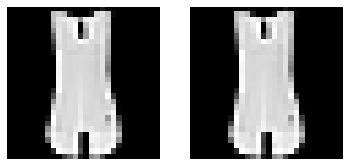

In [24]:
# Visualize the results
plt.subplot(1,2,1)
plt.imshow(tf.squeeze(x_train_fmnist[4]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(tf.squeeze(x_train_fmnist_out[4]), cmap = 'gray', vmin = 0, vmax = 1)
plt.axis('off')
plt.show()

## Cifar10

In [25]:
# Download the data and divede into train and test
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = cifar10.load_data()

# Normalize, reshape and one hot encoding
x_train_c10 = x_train_c10/255.
x_test_c10 = x_test_c10/255.

x_train_c10, x_val_c10, y_train_c10, y_val_c10 = train_test_split(x_train_c10, y_train_c10, test_size = 0.1)

x_train_c10 = x_train_c10.reshape(45000, 32, 32, 3)
x_val_c10 = x_val_c10.reshape(5000, 32, 32, 3)
x_test_c10 = x_test_c10.reshape(10000, 32, 32, 3)

y_train_c10 = to_categorical(y_train_c10)
y_val_c10 = to_categorical(y_val_c10)
y_test_c10 = to_categorical(y_test_c10)

In [26]:
print(x_train_c10.shape, y_train_c10.shape)
print(x_val_c10.shape, y_val_c10.shape)
print(x_test_c10.shape, y_test_c10.shape)

(45000, 32, 32, 3) (45000, 10)
(5000, 32, 32, 3) (5000, 10)
(10000, 32, 32, 3) (10000, 10)


### Check weights

In [31]:
# Define model with GDN
model1 = Sequential()
model1.add(GDN(input_shape = x_train_c10.shape[1:4]))
model1.add(Conv2D(32, 3, input_shape = x_train_c10.shape[1:4]))
model1.add(AveragePooling2D())
model1.add(GDN())
model1.add(Conv2D(32, 3))
model1.add(AveragePooling2D())
model1.add(Flatten())
model1.add(Dense(10))
model1.add(Softmax())

model1.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gdn_4 (GDN)                  (None, 32, 32, 3)         90        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
gdn_5 (GDN)                  (None, 15, 15, 32)        9312      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [32]:
# Check weights
pesos_model1 = model1.get_weights()
pesos_model1[:4]

[array([1., 1., 1.], dtype=float32),
 array([1., 1., 1.], dtype=float32),
 array([1., 1., 1.], dtype=float32),
 array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]], dtype=float32)]

In [33]:
# Train the model
model1.fit(x_train_c10, y_train_c10, epochs = 2, batch_size = 32)

Epoch 1/2
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7546 - accuracy: 0.3793
Epoch 2/2
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4999 - accuracy: 0.4667


In [34]:
# Check the weights have changed
pesos_model1_out = model1.get_weights()
pesos_model1_out[:4]

[array([0.94617003, 0.98173374, 0.974454  ], dtype=float32),
 array([1.2997419, 1.2774343, 1.1945586], dtype=float32),
 array([0.8562965 , 1.0128518 , 0.28593332], dtype=float32),
 array([[[[-0.0000000e+00,  3.6520358e-02,  1.6068681e-03],
          [ 1.9575197e-03,  2.8144123e-03,  1.3360444e-03],
          [ 9.8725464e-03,  5.1136658e-02,  2.9707950e-04]],
 
         [[-0.0000000e+00,  4.2612419e-02,  1.3061567e-03],
          [ 1.4197965e-03,  3.2009808e-03,  9.6749514e-04],
          [ 2.9929378e-03,  6.1169859e-02,  1.7751211e-04]],
 
         [[-0.0000000e+00,  3.4530032e-02,  5.1405432e-04],
          [ 2.2236940e-03,  3.3830772e-03,  4.4870639e-04],
          [ 5.1003653e-03,  5.1244471e-02,  1.1800362e-04]]],
 
 
        [[[-0.0000000e+00,  4.6543427e-02,  3.8826608e-04],
          [ 1.0697740e-03,  2.7771334e-03,  3.4171017e-04],
          [ 1.9156184e-02,  6.3725233e-02,  4.0181141e-05]],
 
         [[-0.0000000e+00,  5.1363636e-02,  2.7924904e-04],
          [ 3.7362488e-04